In [1]:
import requests, os, time, json
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Gathering
Download `image_predictions.tsv` from Udacity website if it is not in the current folder

In [2]:
if not os.path.exists('image_predictions.tsv'):
    url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    response=requests.get(url)
    with open('image_predictions.tsv', mode='wb') as file:
        file.write(response.content)

In [3]:
#tweepy authorization
consumer_key = 'my_consumer_key'
consumer_secret = 'my_consumer_secret'
access_token = 'my_access_token'
access_secret = 'my_access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Download all the tweets

In [4]:
need_download_again=False      # Change to 'True' when you need to re-download all the 2356 tweets again.
if need_download_again:
# delete old file
    if os.path.exists('tweet_json.txt'):
        os.remove('tweet_json.txt')

    start = time.time()
    unsuccess_id=[]
    total_num=twitter.shape[0]
    for i in range(total_num):
        tweet_id=str(twitter.iloc[i,0])
        try:
            r=api.get_status(tweet_id, tweet_mode='extended')
        except:
            print('unsuccessful retrive tweet_id:{}, no is:{}'.format(tweet_id, i))
            unsuccess_id.append(tweet_id)
            continue
        r=api.get_status(tweet_id, tweet_mode='extended')

        # open empty file with append mode   
        with open('tweet_json.txt', mode='a') as file:
            file.write(json.dumps(r._json)+'\n')

        if (i%100==0) & (i!=0) &(i!=total_num-1):
            end = time.time()
            print('{}% complete!   Total time usage: {:.2f} min'.format(round((i+1)/total_num*100), (end-start)/60))

    end = time.time()
    print('{}% complete!   Total time usage: {:.2f} min'.format(100, (end-start)/60))

Read data into pandas dataframe

In [5]:
image_predictions_raw=pd.read_csv('image_predictions.tsv',sep='\t')
twitter_raw=pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
# Read 'tweet_json.txt' into pandas dataframe
favorite_count=[]
tweet_id=[]
retweet_count=[]
with open ('tweet_json.txt',mode='r') as file:
    for i in range(twitter_raw.shape[0]-11):    # 11 tweets download unsucess
        r=file.readline()
        js=json.loads(r)
        favorite_count.append(js['favorite_count'])
        retweet_count.append(js['retweet_count'])
        tweet_id.append(js['id_str'])

twitter_download_raw=pd.DataFrame({ 'tweet_id':tweet_id,
              'favorite_count':favorite_count,
              'retweet_count':retweet_count,            
                }, columns=['tweet_id','retweet_count','favorite_count'])

# 2) Accessing
### Visual assessment

In [7]:
pd.set_option('max_colwidth',200)

In [8]:
twitter_raw
# It can be seen that a few dogs were named 'a'/'an'/. These are clearly mistakes as can be seen from column 'text'.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [9]:
image_predictions_raw.head(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False


In [10]:
twitter_download_raw.sample(10)

,tweet_id,retweet_count,favorite_count
980,748699167502000129,1764,5091
1320,705591895322394625,1259,3384
951,750868782890057730,1536,5158
389,825026590719483904,1431,6858
344,831315979191906304,1231,6976
1990,672482722825261057,638,1173
1824,676101918813499392,1247,2955
347,830956169170665475,1664,8551
1810,676582956622721024,305,1270
858,761745352076779520,950,4601


### Programmatic assessment

In [11]:
twitter_raw.info()
# data type problem: tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id
# data type problem: retweeted_status_timestamp, timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_raw.rating_denominator.value_counts()
# A few rating_denominators are not 10, I will double check them.

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
twitter_raw[twitter_raw.rating_denominator!=10]
## From the 'text' column it can be seen that some are mistakes.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitte

In [14]:
twitter_raw.rating_numerator.value_counts()
# There are many 'rating_numerator' far from 10. I will double check them.

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
twitter_raw[twitter_raw.rating_denominator==10][twitter_raw.rating_numerator>20]
# To my surprise, the highest rating_numerator of 1776 is true!!
# However, we can see some are mistakes, for example: the rating_numerator should be 11.26 instead of 26 for tweet id :680494726643068929

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None


In [16]:
twitter_raw.name.value_counts()
#  55 dogs are named 'a'; 7 dogs are named 'an'; 8 dogs are named 'the'; These are mistakes.

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Buddy         7
Toby          7
Bailey        7
Daisy         7
an            7
Jack          6
Milo          6
Stanley       6
Bella         6
Oscar         6
Leo           6
Dave          6
Jax           6
Scout         6
Koda          6
Rusty         6
Gus           5
           ... 
Wiggles       1
Aqua          1
Billl         1
Zeek          1
Bilbo         1
Ralphé        1
Lucia         1
Bones         1
Kial          1
Damon         1
by            1
Carper        1
Strudel       1
Tommy         1
Sora          1
Clifford      1
Jersey        1
Miley         1
Jarod         1
Millie        1
Doobert       1
Apollo        1
Gert          1
Aldrick       1
Rhino         1
Sailer        1
Chaz          1
Eriq          1
Ace           1
light         1
Name: name, Length: 957,

In [17]:
twitter_raw[~twitter_raw.retweeted_status_id.isnull()]
# These tweets are retweets. Since we only want original ratings (no retweets), we need to delete these retweets.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,http...",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,http...",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,h...",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https

In [18]:
twitter_raw.expanded_urls
# some expanded_urls repeated a few times. For example, the urls in line 4 and 7 repeat twice.

0                                                                                                                                               https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                                                                                               https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                                                                                                               https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                                                                                                               https://twitter.com/dog_rates/status/891689557279858688/photo/1
4                                                                               https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_

In [19]:
image_predictions_raw.info()
# The datatype of tweet_id is int.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality
**`twitter` table**
1. The table has retweets but we only want original ratings.  Retweets are tweets with non-null retweeted_status_id.
2. Columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are all null after deleting retweets. So these columns should be removed.
3. Erroneous datatypes (tweet_id, in_reply_to_status_id, in_reply_to_user_id should be string type instead of int/float since their calculation doesn't make any sense)
4. timestamp have a datatype of string, which should be changed to datetime
5. rating_denominators and rating_numerator of tweet_id(835246439529840640, 832088576586297345) are not correct.
6. dog named 'a'/'an'/'the'
7. dog named 'by'
8. repeated urls in column 'expanded_urls'

**`image_predictions` table**
9. tweet_id should has a data type of string

### Tidiness
10. One variable in four columns in `twitter` table ('doggo','floofer','pupper','puppo').
11. `twitter_download`, `image_predictions` and `twitter` should be merge into one table.

# 3) Cleaning

In [20]:
# make copy of original files before cleaning
image_predictions=image_predictions_raw.copy()
twitter=twitter_raw.copy()
twitter_download=twitter_download_raw.copy()

##### 1. Define
Remove retweets in table `twitter`

#### Code

In [21]:
# delete tweets with retweeted_status_id
twitter=twitter[twitter.retweeted_status_id.isnull()]

#### Test

In [22]:
twitter[~twitter.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### 2. Define
Delete columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

#### Code

In [23]:
twitter.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [24]:
twitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

##### 3. Define
Change datatypes of tweet_id, in_reply_to_status_id, in_reply_to_user_id to string

#### Code

In [25]:
twitter.in_reply_to_status_id=twitter.in_reply_to_status_id.astype('str')
twitter.in_reply_to_user_id=twitter.in_reply_to_user_id.astype('str')
twitter.tweet_id=twitter.tweet_id.astype('str')

#### Test

In [26]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: int64(2), object(12)
memory usage: 254.9+ KB


##### 4. Define
Change datatypes of timestamp to datetime
#### Code

In [27]:
twitter.timestamp=pd.to_datetime(twitter.timestamp)

##### Test

In [28]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 254.9+ KB


##### 5. Define
Change rating_denominators and rating_numerator of tweet_id (835246439529840640 and 832088576586297345 ) to 13/10 and NaN
#### Code

In [29]:
twitter.loc[313,'rating_numerator']=int(13)
twitter.loc[313,'rating_denominator']=int(10)
twitter.loc[342,'rating_denominator']=np.nan
twitter.loc[342,'rating_numerator']=np.nan

#### Test

In [30]:
twitter[twitter.tweet_id=='832088576586297345']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875475599974e+17,30582082.0,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,None,None,None,None,None


In [31]:
twitter[twitter.tweet_id=='835246439529840640']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.35245984028504e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,13.0,10.0,None,None,None,None,None


##### 6. Define
Change dog name of 'a'/'an' to 'None'
#### Code

In [32]:
twitter.name.replace('a','None',inplace=True)
twitter.name.replace('an','None',inplace=True)
twitter.name.replace('the','None',inplace=True)

#####  Test

In [33]:
twitter.name.value_counts()

None         749
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Winston        8
Lola           8
Sadie          8
Toby           7
Daisy          7
Koda           6
Bella          6
Bailey         6
Stanley        6
Jax            6
Bo             6
Oscar          6
Scout          5
Chester        5
Bentley        5
Dave           5
Rusty          5
Leo            5
Buddy          5
Louis          5
Milo           5
Dexter         4
Scooter        4
            ... 
Sailor         1
Andy           1
Bookstore      1
Jim            1
Aldrick        1
Apollo         1
Jordy          1
Eriq           1
Ruffles        1
Herb           1
Kuyu           1
Geno           1
Erik           1
Bruno          1
Striker        1
Bones          1
Damon          1
by             1
Carper         1
Strudel        1
Tommy          1
Sora           1
Clifford       1
Jersey         1
Miley          1
Kial           1
Jarod          1
Betty         

##### 7. Define
Change dog name of 'by' to 'None'
#### Code

In [34]:
twitter.name.replace('by','None',inplace=True)

#### Test

In [35]:
twitter[twitter.name=='by']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### 8. Define
Remove repeated urls in the `expanded_urls` column in the `twitter` table 
#### Code

In [36]:
## remove repeated urls
def remove_repeated_url(url):
    url_list=str(url).split(',')
    s=url_list[0].strip()
    if len(url_list)>1:
        for i in range(len(url_list)-1):
            if url_list[i+1]!=url_list[0]:
                s=s+url_list[i+1]
    return s.strip()

twitter.expanded_urls=twitter.expanded_urls.apply(remove_repeated_url)

#### Test

In [37]:
twitter.expanded_urls

0                                                                                                            https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                                                            https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                                                                            https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                                                                            https://twitter.com/dog_rates/status/891689557279858688/photo/1
4                                                                                                            https://twitter.com/dog_rates/status/891327558926688256/photo/1
5                                                                                                            https://twitter.com/dog_ra

##### 9. Define
Change the data type of `tweet_id` in the `image_predictions` table to string.
#### Code

In [38]:
image_predictions.tweet_id=image_predictions.tweet_id.astype('str')

#### Test

In [39]:
image_predictions.tweet_id.dtype

dtype('O')

##### 10. Define
Merge four columns in `twitter` table ('doggo','floofer','pupper','puppo') into one column(dog_stage)
#### Code

In [40]:
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,None,None,None,None
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,https://gofundme.com/ydvmve-surgery-for-jaxhttps://twitter.com/dog_rates/status/890971913173991426/photo/1,13.0,10.0,Jax,None,None,None,None
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://twitter.com/dog_rates/status/890729181411237888/photo/1,13.0,10.0,None,None,None,None,None
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,None,None,None,None
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/8902402553491

In [41]:
# Creat column dog_stages
twitter['dog_stages']='None'
for i in range(twitter.shape[0]):
    if twitter.iloc[i, 10]!='None':
        twitter.iloc[i, 14]='doggo'
    if twitter.iloc[i, 11]!='None':
        twitter.iloc[i, 14]='floofer'
    if twitter.iloc[i, 12]!='None':
        twitter.iloc[i, 14]='pupper'
    if twitter.iloc[i, 13]!='None':
        twitter.iloc[i, 14]='puppo'
        
# delete columns doggo, floofer, pupper, puppo
twitter.drop(['doggo','floofer','pupper','puppo'],axis=1, inplace=True)

In [42]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10.0,Franklin,None


##### 11. Define
Merge `twitter_download`, `image_predictions` and `twitter` one table.
#### Code

In [43]:
temp=pd.merge(twitter_download, twitter, on='tweet_id', how='right')
twitter=pd.merge(temp, image_predictions, on='tweet_id', how='left')

#### Code

In [44]:
twitter.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [45]:
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


# 4) Storing

In [46]:
# save the cleaned data to a csv file
twitter.to_csv('twitter_archive_master.csv',index=False)

# 5) Analysis and visualization

In [47]:
%matplotlib inline

### 1. How many original tweets were posted in each month?

Text(0,0.5,'The number of tweets')

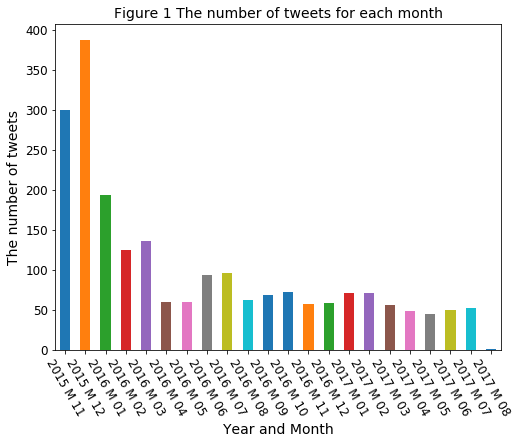

In [48]:
plt.figure(figsize=(8, 6))
plt.title("Figure 1 The number of tweets for each month", loc="center", fontsize=14)
twitter.groupby(twitter.timestamp.map(lambda x: str(x.year)+' M '+'{:02d}'.format(x.month))).tweet_id.agg('count').plot(kind='bar', fontsize=12,rot=-60)
plt.xlabel("Year and Month", fontsize=14)
plt.ylabel("The number of tweets", fontsize=14)

### 2. How many times each tweet were retweeted on average in each month?

Text(0,0.5,'Average retweet count')

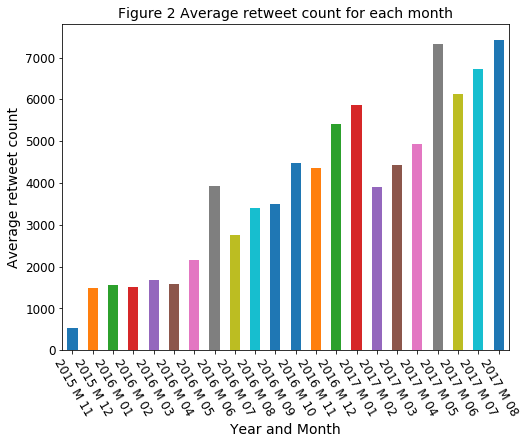

In [49]:
plt.figure(figsize=(8, 6))
plt.title("Figure 2 Average retweet count for each month", loc="center", fontsize=14)
twitter.groupby(twitter.timestamp.map(lambda x: str(x.year)+' M '+'{:02d}'.format(x.month))).retweet_count.agg('mean').plot(kind='bar', fontsize=12,rot=-60)
plt.xlabel("Year and Month", fontsize=14)
plt.ylabel("Average retweet count", fontsize=14)

### 3. How many favorites each tweet got on average in each month?

Text(0,0.5,'Average favorite counts')

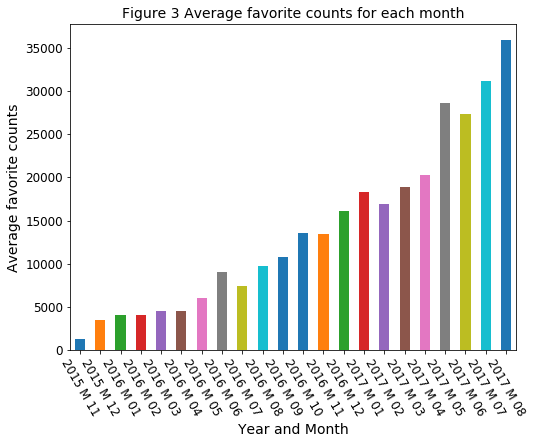

In [50]:
plt.figure(figsize=(8, 6))
plt.title("Figure 3 Average favorite counts for each month", loc="center", fontsize=14)
twitter.groupby(twitter.timestamp.map(lambda x: str(x.year)+' M '+'{:02d}'.format(x.month))).favorite_count.agg('mean').plot(kind='bar', fontsize=12,rot=-60)
plt.xlabel("Year and Month", fontsize=14)
plt.ylabel("Average favorite counts", fontsize=14)

### 4. What are the main sources of tweets?

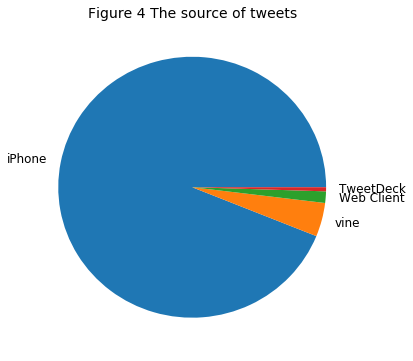

In [51]:
plt.figure(figsize=(6, 6))
plt.title("Figure 4 The source of tweets", loc="center", fontsize=14)
twitter.source.rename('').value_counts().plot(kind='pie', fontsize=12, labels=['iPhone','vine','Web Client','TweetDeck'])
# 

### 5. When the neural network makes mistakes (believe the image is not a dog), what usually the neural network thinks the image is?

Text(0.5,1,'Figure 5 The top 10 common mistakes of neural network')

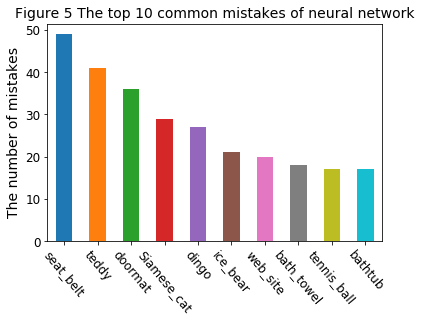

In [52]:
# count the 10 most common mistakes
lst1=list(image_predictions.p1[image_predictions.p1_dog==False].values)
lst2=list(image_predictions.p2[image_predictions.p2_dog==False].values)
lst3=list(image_predictions.p3[image_predictions.p3_dog==False].values)
mistake_list=lst1+lst2+lst3
from collections import Counter
counts=Counter(mistake_list).most_common(10)

# create a bar plot
guess=[]
num_guess=[]
for i in range(len(counts)):
    guess.append(counts[i][0])
    num_guess.append(counts[i][1])
pd.Series(num_guess, index=guess).plot(kind='bar', fontsize=12,rot=-50)
plt.ylabel("The number of mistakes", fontsize=14)
plt.title("Figure 5 The top 10 common mistakes of neural network", loc="center", fontsize=14)

### 6. What are the most common dog names?

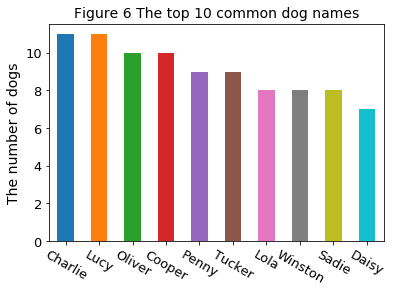

In [53]:
twitter.name.value_counts().iloc[1:11].plot(kind='bar', fontsize=13,rot=-30)
plt.ylabel("The number of dogs", fontsize=14)
plt.title("Figure 6 The top 10 common dog names", loc="center", fontsize=14);


### 7. What are the distributions of dog stages?

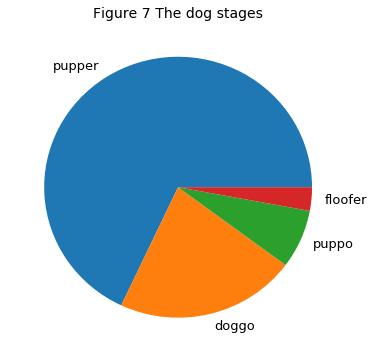

In [54]:
plt.figure(figsize=(6, 6))
plt.title("Figure 7 The dog stages", loc="center", fontsize=14)
twitter.dog_stages.rename('').value_counts().drop('None').plot(kind='pie', fontsize=13)

### 8. How did the rating changes over time?

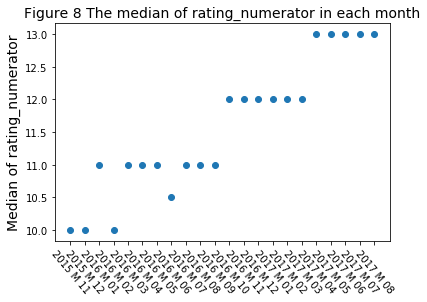

In [55]:
temp=twitter.groupby(twitter.timestamp.map(lambda x: str(x.year)+' M '+'{:02d}'.format(x.month))).rating_numerator.agg('median')
plt.scatter(temp.index, temp);
plt.xticks(rotation=-50);
plt.ylabel("Median of rating_numerator", fontsize=14)
plt.title("Figure 8 The median of rating_numerator in each month", loc="center", fontsize=14);